# This Notebook is for MNIST data classification using RESNET50.

<img src="logo.png">

In [1]:
# Step 1. Data Loading
import keras
import tensorflow as tf

In [2]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

--2020-11-06 10:29:58--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.2.112, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz’

mnist.npz           100%[===================>]  10.96M  --.-KB/s    in 0.06s   

2020-11-06 10:29:58 (189 MB/s) - ‘mnist.npz’ saved [11490434/11490434]



In [53]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data(path='mnist.npz')

In [1]:
# x_test.shape

In [ ]:
# img_rows=x_train[0].shape[0]
# img_cols=x_train[0].shape[1]
# x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)

In [ ]:
# def prepare_data_for_resnet50(data_to_transform):
#     data = data_to_transform.copy()
#     data = data.reshape(-1, 28, 28) / 255
#     data = X_rgb = np.stack([data, data, data], axis=-1)
#     return data

In [ ]:
# x_train = x_train.reshape((60000, 28, 28, 1))
# x_train = x_train.repeat(3, -1)  # repeat the last (-1) dimension three times
# x_train = x_train.convert_to_tensor(x_train)
# assert x_train.shape == (60000, 28, 28, 3)

Reshaping the input n dim array to match resnet model (expecting 3 channels)

In [55]:
#reshaping x_train
X = x_train.reshape((60000, 28, 28, 1))
X = X.repeat(3, -1)  # repeat the last (-1) dimension three times
x_train = tf.convert_to_tensor(X)
assert x_train.shape == (60000, 28, 28, 3)

In [56]:
#reshaping x_test
X = x_test.reshape((10000, 28, 28, 1))
X = X.repeat(3, -1)  # repeat the last (-1) dimension three times
x_test = tf.convert_to_tensor(X)
assert x_test.shape == (10000, 28, 28, 3)

In [57]:
print(x_train.shape,type(x_train))

(60000, 28, 28, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [58]:
print(x_test.shape,type(x_test))

(10000, 28, 28, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [59]:
from keras.utils import to_categorical #converting to array which has columns equal to the number of categories in the data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [60]:
print(y_train) 
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
from matplotlib import pyplot as plt
import numpy as np
# print(y_train[3])
def imageFormat(image1):
  image1 = np.array(image1, dtype='float')
  pixels = image1.reshape((28, 28,3))
  return  pixels


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


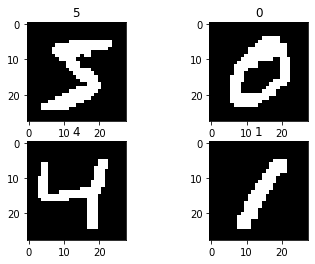

In [62]:
f, axarr = plt.subplots(2,2) # axarr array of axis
axarr[0,0].imshow(imageFormat(x_train[0]),label="1111")
axarr[0,0].title.set_text(np.argmax(y_train[0]))
axarr[0,1].imshow(imageFormat(x_train[1]),label="1111")
axarr[0,1].title.set_text(np.argmax(y_train[1]))
axarr[1,0].imshow(imageFormat(x_train[2]),label="1111")
axarr[1,0].title.set_text(np.argmax(y_train[2]))
axarr[1,1].imshow(imageFormat(x_train[3]),label="1111")
axarr[1,1].title.set_text(np.argmax(y_train[3]))

# Importing Libraries

In [63]:
from keras.layers import  Input, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
import numpy as np
from glob import glob
print("Libs imported")

# if you are  changing the neumber of  neurons from N to n where N>n: this is called :'constructive' learning
#The network can take the input image having height, width as multiples of 32 and 3 as channel width
IMAGE_SIZE=[32,32]

Libs imported


# Using a pretrained ResNet50 CNN model which is already trained on 1000 object categories

In [64]:
resnet = ResNet50(include_top=False,  pooling='none', input_shape=IMAGE_SIZE +[3],  weights='imagenet')

In [65]:
cfg = resnet.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 28, 28, 1) #can accept input data of the defined batch size
resnet_model = Model.from_config(cfg) 

#it is a 50 layer model and we will be adding an additional dense layer of size 10 
#marking layers to non-trainable. We are trusting the existing weights to work so no need to retrain those.


In [66]:
for layers in resnet.layers:
    layers.trainable= False

In [67]:
#Taking the output of the last convolution block in ResNet50
X=Flatten()(resnet.output)
# Adding a fully connected layer having 10 neurons
no_classes=10
prediction=Dense(no_classes, activation='softmax',name="Abhishek_layer")(X) 

In [68]:
# Model to be trained
model=Model(inputs=resnet.input, outputs=prediction)

In [69]:
print(model.summary())

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [70]:
#set what cost and optimization method to use for our model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [100]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2082 - accuracy: 0.9334 - val_loss: 0.2144 - val_accuracy: 0.9366
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1798 - accuracy: 0.9424 - val_loss: 0.2038 - val_accuracy: 0.9340
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1572 - accuracy: 0.9496 - val_loss: 0.1926 - val_accuracy: 0.9424
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1488 - accuracy: 0.9521 - val_loss: 0.1946 - val_accuracy: 0.9443
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1386 - accuracy: 0.9557 - val_loss: 0.1748 - val_accuracy: 0.9461
Epoch 6/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1338 - accuracy: 0.9560 - val_loss: 0.1781 - val_accuracy: 0.9489
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1250 - accuracy: 0.9592 - val_loss: 0.1600 -

# Displaying results after training our model for 20 iterations

In [101]:
import pandas as pd
print(pd.DataFrame(hist.history).iloc[-1])

loss            0.089429
accuracy        0.971017
val_loss        0.201885
val_accuracy    0.952900
Name: 19, dtype: float64


{'loss': [0.20815303921699524, 0.17978999018669128, 0.15718211233615875, 0.14884410798549652, 0.13860705494880676, 0.13380210101604462, 0.1249675452709198, 0.12158224731683731, 0.1185750737786293, 0.11335867643356323, 0.10944399237632751, 0.10592535883188248, 0.1018630638718605, 0.10025867819786072, 0.09862472862005234, 0.09391879290342331, 0.09259484708309174, 0.09025169909000397, 0.0886201560497284, 0.08942859619855881], 'accuracy': [0.9333500266075134, 0.9424499869346619, 0.9495999813079834, 0.9520833492279053, 0.9556666612625122, 0.9559833407402039, 0.9592499732971191, 0.9603333473205566, 0.9615499973297119, 0.9630666375160217, 0.9647499918937683, 0.9654666781425476, 0.9667666554450989, 0.9673500061035156, 0.9675666689872742, 0.9685166478157043, 0.9699666500091553, 0.9702666401863098, 0.9711499810218811, 0.9710166454315186], 'val_loss': [0.214376300573349, 0.20378650724887848, 0.19260616600513458, 0.19457098841667175, 0.17477326095104218, 0.1780567169189453, 0.15995940566062927, 0.

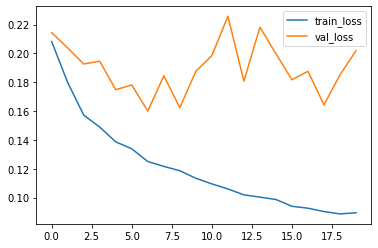

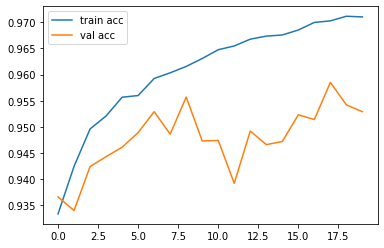

In [102]:
print(hist.history)
#plot the loss
plt.plot(hist.history['loss'], label='train_loss')
plt.plot(hist.history['val_loss'] , label='val_loss')

plt.legend()

plt.savefig('LossVal_loss')
plt.show()

#plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('AccVal_acc')
plt.show()

#for final verification

(1, 32, 32, 3)
[[4.0382233e-12 8.4488057e-23 1.1997013e-20 4.7672711e-13 5.6324867e-20
  2.2894463e-07 8.6946329e-19 9.9999976e-01 4.2537612e-22 3.3729800e-16]]
[[4.038223314767331e-12, 8.448805686733974e-23, 1.199701320636927e-20, 4.767271104787196e-13, 5.632486694610093e-20, 2.2894462858857878e-07, 8.69463293732171e-19, 0.9999997615814209, 4.253761153924565e-22, 3.372979957777598e-16]]


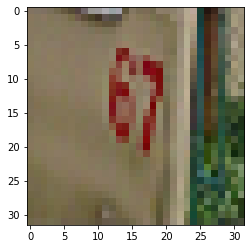

[7]


In [110]:
#for final verification
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import preprocess_input
img=image.load_img('93.png', target_size=(32,32))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0) # just increasing the rank 
x = preprocess_input(x)
print(x.shape)
a=model.predict(x)
print(a)
# print(np.exp(a))
# print(a[:][:1])
# list1=[model.predict(x)]
# print(list1)

arr=model.predict(x)
list1=arr.tolist()
print(list1)
a1=np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
[[1.0000000e+00 6.7570196e-18 2.4729249e-18 1.3056211e-28 3.1203105e-21
  5.4307284e-16 1.4124757e-16 2.4537796e-21 1.5354790e-19 2.3450353e-19]]
[[1.0, 6.757019634673663e-18, 2.472924890422965e-18, 1.3056211315916479e-28, 3.120310457225243e-21, 5.430728447914897e-16, 1.412475746894319e-16, 2.453779588350272e-21, 1.535478956716905e-19, 2.345035323096754e-19]]


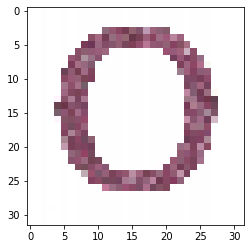

[0]


In [108]:
#for final verification
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import preprocess_input
img=image.load_img('0.png', target_size=(32,32))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0) # just increasing the rank 
x = preprocess_input(x)
print(x.shape)
a=model.predict(x)
print(a)
# print(np.exp(a))
# print(a[:][:1])
# list1=[model.predict(x)]
# print(list1)

arr=model.predict(x)
list1=arr.tolist()
print(list1)
a1=np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
[[2.0896752e-27 0.0000000e+00 1.0000000e+00 0.0000000e+00 8.7240469e-17
  0.0000000e+00 0.0000000e+00 0.0000000e+00 9.7544132e-18 0.0000000e+00]]
[[2.0896752045609608e-27, 0.0, 1.0, 0.0, 8.724046942236698e-17, 0.0, 0.0, 0.0, 9.754413222607047e-18, 0.0]]


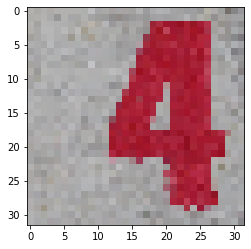

[2]


In [111]:
#for final verification
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import preprocess_input
img=image.load_img('4.png', target_size=(32,32))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0) # just increasing the rank 
x = preprocess_input(x)
print(x.shape)
a=model.predict(x)
print(a)
# print(np.exp(a))
# print(a[:][:1])
# list1=[model.predict(x)]
# print(list1)

arr=model.predict(x)
list1=arr.tolist()
print(list1)
a1=np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

(1, 32, 32, 3)
[[1.7046061e-35 5.1291703e-17 1.2997116e-22 8.3728697e-29 3.0854208e-26
  3.3190118e-26 1.0000000e+00 2.6605590e-27 1.4245034e-10 3.0198589e-21]]
[[1.704606140359144e-35, 5.129170292662483e-17, 1.2997115764417795e-22, 8.372869692251706e-29, 3.0854208140404117e-26, 3.3190117725400863e-26, 1.0, 2.6605589734902364e-27, 1.424503431879387e-10, 3.0198589037947676e-21]]


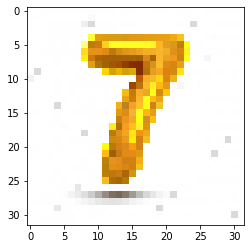

[6]


In [113]:
#for final verification
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.applications.resnet50 import preprocess_input
img=image.load_img('7.png', target_size=(32,32))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0) # just increasing the rank 
# x = preprocess_input(x)
print(x.shape)
a=model.predict(x)
print(a)
# print(np.exp(a))
# print(a[:][:1])
# list1=[model.predict(x)]
# print(list1)

arr=model.predict(x)
list1=arr.tolist()
print(list1)
a1=np.argmax(model.predict(x), axis=1)
plt.imshow(img)
plt.show()
print(a1)

Using SKLEARN API to calculate different performance parameters

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

In [115]:
#predicting on batch of test images and storing the result in y_pred
y_pred=model.predict_on_batch(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1),labels=[0,1,2,3,4,5,6,7,8,9])

In [116]:
#y_pred.argmax(axis=1)

In [117]:
print(matrix)

[[ 964    0    2    0    2    2    7    2    1    0]
 [   0 1125    0    0    1    0    3    3    2    1]
 [   4    1  972    4    4    6    5   23   13    0]
 [   2    1   21  922    1   33    4   11   13    2]
 [   0    2    4    0  950    0    6   13    4    3]
 [   0    3    1   16    2  840   14    6    9    1]
 [   1    2    3    0    2    7  942    0    1    0]
 [   0    4    9    3   10    0    0  999    2    1]
 [   0    0    9    2    6   16    5    5  929    2]
 [   3    5   15    7   18    5    2   41   27  886]]


In [118]:
matrix1=classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1),labels=[0,1,2,3,4,5,6,7,8,9])

In [119]:
print(matrix1)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.94      0.94      0.94      1032
           3       0.97      0.91      0.94      1010
           4       0.95      0.97      0.96       982
           5       0.92      0.94      0.93       892
           6       0.95      0.98      0.97       958
           7       0.91      0.97      0.94      1028
           8       0.93      0.95      0.94       974
           9       0.99      0.88      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



# Question 1
The MNIST handwritten digit dataset is one of the most commonly used datasets for image classification. You can access the dataset here: http://yann.lecun.com/exdb/mnist/. It is also available in many ML packages such as TensorFlow, PyTorch, FastAI. Feel free to directly load the dataset via either source. After obtaining the data, design a neural network architecture to perform digit recognition and share your code implementing the NN and appropriate performance metrics on the test set.